In [1]:
from read_data import read_enhanced_microscore_dataset
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from plots import first_plot, second_plot, third_plot, forth_plot, plot_performance, fith_plot
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error

In [2]:
df = read_enhanced_microscore_dataset()

In [3]:
df_base = df[[
    "Habitaciones",
    "Aseos",
    "Terraza",
    "Piscina",
    "Garaje",
    "Precio",
    "Metros",
    # "CodigoPostal",
    "Latitud",
    "Longitud",
    'Caracteristicas'
]]

In [4]:
df_microscore = df[[
    "Habitaciones",
    "Aseos",
    "Terraza",
    "Piscina",
    "Garaje",
    "Precio",
    "Metros",
    # "CodigoPostal",
    "Latitud",
    "Longitud",
    "RentaBrutaHogar",
    "RentaBrutaPersona",
    "poblacion_2023",
    "%_servicios",
    "densidad_inm_m2",
    "%_agricultura",
    "%_industria",
    "%_construccion",
    'Caracteristicas',
    'University_Distance',
    'School_Distance', 'Kindergarten_Distance', 'City Center_Distance',
       'Supermarket_Distance', 'Bakery_Distance', 'Hospital_Distance',
       'Pharmacy_Distance', 'Restaurant_Distance', 'Café_Distance',
       'Park_Distance', 'Gym_Distance', 'Movie Theater_Distance',
       'Theater_Distance', 'Shopping Mall_Distance', 'Bus Stop_Distance',
       'Metro Station_Distance', 'Score'
]]

In [5]:
def prepare_data(df):
    categorical_cols = ['Caracteristicas']
    df = pd.get_dummies(df, columns=categorical_cols)
    df = df.fillna(-1)
    return df

In [6]:
df_base =prepare_data(df_base)
df_microscore =prepare_data(df_microscore)

In [7]:
def linear_regression_kfold(df):
    X = df.drop(columns=["Precio"])  
    y = df["Precio"]
    
    # KFold
    kf = KFold(n_splits=5, shuffle=True, random_state=56)
    
    mae_list = []
    rmse_list = []
    mape_list = []
    
    # 5-fold cross validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Escalado
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        # Entrenamiento Linear Regression model
        linear_model = LinearRegression()
        linear_model.fit(X_train_scaled, y_train)
        
        # Prediccion
        y_pred = linear_model.predict(X_test_scaled)
        
        # Metricas del fold
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        mape = mean_absolute_percentage_error(y_test, y_pred)
        
        mae_list.append(mae)
        rmse_list.append(rmse)
        mape_list.append(mape)
        
        print(f"Fold MAE: {mae:.2f}, RMSE: {rmse:.2f}, MAPE: {mape:.2%}")
    
    # Rendimiento medio entre folds
    print("\n--- Metricas Cross-Validation ---")
    print(f"Average MAE: {np.mean(mae_list):.2f}")
    print(f"Average RMSE: {np.mean(rmse_list):.2f}")
    print(f"Average MAPE: {np.mean(mape_list):.2%}")
    
    # Entrenamiento con todo el dataset
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    linear_model = LinearRegression()
    linear_model.fit(X_scaled, y)
    
    # Coeficientes segun su importancia
    coefficients = pd.DataFrame({
        'Feature': X.columns,
        'Coefficient': linear_model.coef_
    }).sort_values(by='Coefficient', ascending=False)
    
    print("\nFeature Coefficients:")
    print(coefficients)
    return y_test, y_pred


In [8]:
y_test_base, y_pred_base = linear_regression_kfold(df_base)

Fold MAE: 108657.56, RMSE: 204387.23, MAPE: 59.05%
Fold MAE: 109965.59, RMSE: 210857.48, MAPE: 58.44%
Fold MAE: 110670.10, RMSE: 230807.37, MAPE: 57.15%
Fold MAE: 107503.02, RMSE: 197018.29, MAPE: 58.19%
Fold MAE: 110002.08, RMSE: 205454.54, MAPE: 58.60%

--- Cross-Validation Metrics ---
Average MAE: 109359.67
Average RMSE: 209704.98
Average MAPE: 58.29%

Feature Coefficients:
                         Feature   Coefficient
1                          Aseos  1.160292e+05
7                       Longitud  8.501587e+04
5                         Metros  8.348547e+04
3                        Piscina  2.632748e+04
4                         Garaje  8.659728e+03
0                   Habitaciones  3.710532e+03
2                        Terraza  2.546336e+03
6                        Latitud -2.713873e+04
9   Caracteristicas_CountryHouse -8.676962e+16
10         Caracteristicas_House -2.681376e+17
8      Caracteristicas_Apartment -2.757067e+17


In [9]:
y_test_micro, y_pred_micro =linear_regression_kfold(df_microscore)

Fold MAE: 93220.36, RMSE: 181920.18, MAPE: 53.54%
Fold MAE: 94711.23, RMSE: 188388.58, MAPE: 54.15%
Fold MAE: 94204.38, RMSE: 209760.93, MAPE: 51.58%
Fold MAE: 91231.87, RMSE: 173287.90, MAPE: 52.07%
Fold MAE: 94257.65, RMSE: 183257.60, MAPE: 53.76%

--- Cross-Validation Metrics ---
Average MAE: 93525.10
Average RMSE: 187323.04
Average MAPE: 53.02%

Feature Coefficients:
                         Feature   Coefficient
11                   %_servicios  1.473136e+06
14                   %_industria  1.093718e+06
13                 %_agricultura  6.686486e+05
15                %_construccion  4.991043e+05
1                          Aseos  9.703830e+04
5                         Metros  8.393495e+04
9              RentaBrutaPersona  6.043670e+04
7                       Longitud  4.075344e+04
12               densidad_inm_m2  3.033607e+04
3                        Piscina  3.008607e+04
29              Theater_Distance  1.216941e+04
8                RentaBrutaHogar  1.061547e+04
4              

C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:156: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_blue = df_plot_base.groupby("log_bin")["%error"].mean().reset_index()
C:\Users\emebe\Documents\GitHub\tfm_cleaned\plots.py:163: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  result_red = df_plot__micro.groupby("log_bin")["%error"].mean().reset_index()


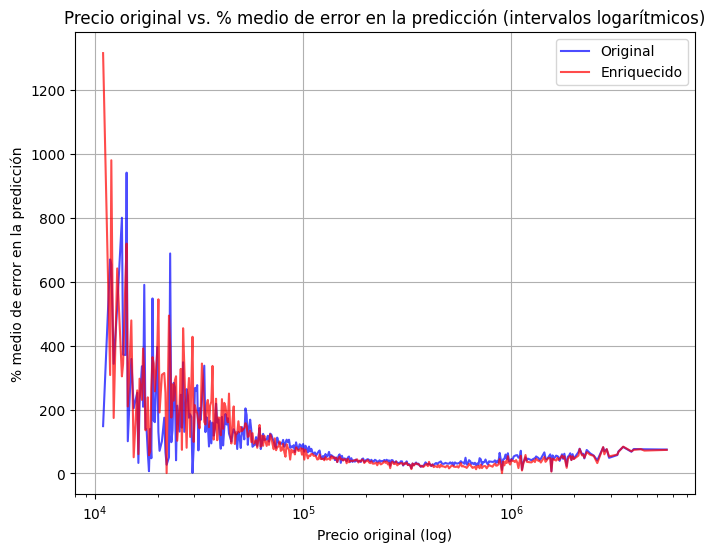

In [10]:
fith_plot(y_test_base, y_pred_base, y_test_micro, y_pred_micro)